## Energy levels in conjugated molecules

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

### Hamiltonian for the electrons as a matrix

-test with fake t value

In [2]:
def H(n,x):
    temp = [-1 + (-1)**(nn)*x for nn in range(0,n-1)]
    upD = np.diag(temp,1)
    loD = np.diag(temp,-1)
    H = upD+loD
    H[0,-1] = -1 + -1*x
    H[-1,0] = -1 + (-1)**(n+1)*x
    return H

In [3]:
print(H(6,0.1))

[[ 0.  -0.9  0.   0.   0.  -1.1]
 [-0.9  0.  -1.1  0.   0.   0. ]
 [ 0.  -1.1  0.  -0.9  0.   0. ]
 [ 0.   0.  -0.9  0.  -1.1  0. ]
 [ 0.   0.   0.  -1.1  0.  -0.9]
 [-1.1  0.   0.   0.  -0.9  0. ]]


In [4]:
H0 = H(6,0.1)
np.linalg.eig(H0)  #solve for eigen-value energy term

(array([-2.        , -1.01488916,  2.        ,  1.01488916,  1.01488916,
        -1.01488916]),
 array([[-0.40824829, -0.57735027,  0.40824829, -0.57735027, -0.06950319,
         -0.01775529],
        [-0.40824829, -0.19910804, -0.40824829,  0.19910804,  0.56195915,
         -0.54779796],
        [-0.40824829,  0.28867513,  0.40824829,  0.28867513, -0.46161216,
         -0.49088586],
        [-0.40824829,  0.56888012, -0.40824829, -0.56888012, -0.16629988,
          0.11598113],
        [-0.40824829,  0.28867513,  0.40824829,  0.28867513,  0.53111535,
          0.50864115],
        [-0.40824829, -0.36977208, -0.40824829,  0.36977208, -0.39565927,
          0.43181683]]))

In [5]:
x = 0.1
scan = np.linspace(2,100,48)
energy = []
E_pern = []
for nn in scan:
    ee,vv = np.linalg.eig(H(int(nn),x))
    temp = np.sort(ee)
    energy.append(np.sum(temp[:int(len(temp)/2)]))
    E_pern.append(np.mean(temp[:int(len(temp)/2)])*2)  #two electrons per bound

/Users/Macintosh/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


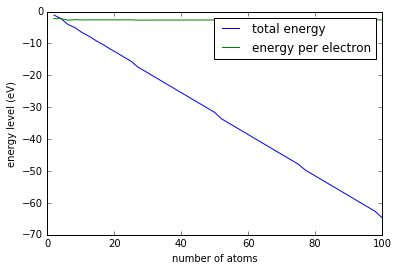

In [6]:
plt.plot(scan,energy,label='total energy')
plt.plot(scan,E_pern,label='energy per electron')
plt.xlabel('number of atoms')
plt.ylabel('energy level (eV)')
plt.legend()

/Users/Macintosh/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


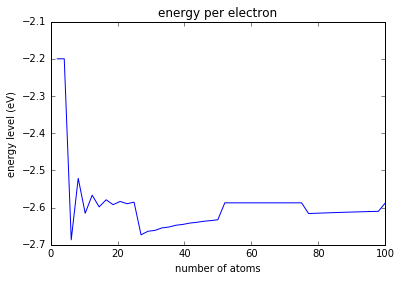

In [7]:
plt.title('energy per electron')
plt.plot(scan,E_pern)
plt.xlabel('number of atoms')
plt.ylabel('energy level (eV)')

## Stretch and compress molecular bound between atoms

Should benzene have alternating single and double bonds (u =$ ̸$ 0), or should all bonds be equivalent (u = 0)?

In [8]:
def Hu(n,u):
    '''
    Hamiltonian of n-member ring with u displacement of bonding between atoms
    t=2.5 eV
    alpha = 4.1 eV/A
    K = 21 eV/A**2
    '''
    temp = [-2.5 + 4.1*(-1)**(nn)*u for nn in range(0,n-1)]
    upD = np.diag(temp,1)
    loD = np.diag(temp,-1)
    H = upD+loD
    H[0,-1] = -2.5 + -4.1*u
    H[-1,0] = -2.5 + 4.1*(-1)**(n+1)*u
    return H

In [9]:
Ka = 21  #kappa stiffness constant
u = 0.01  #stretch/bend ratio
scan = np.linspace(2,30,15)
bend_energy = []
wo_bend = []
for nn in scan:
    ee,vv = np.linalg.eig(Hu(int(nn),u))
    temp = np.sort(ee)
    bend_energy.append(np.sum(temp[:int(len(temp)/2)]) + (nn-1)*0.5*Ka*u**2)  #with bending energy
    ee,vv = np.linalg.eig(Hu(int(nn),0))
    temp = np.sort(ee)
    wo_bend.append(np.sum(temp[:int(len(temp)/2)]))  #without

/Users/Macintosh/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


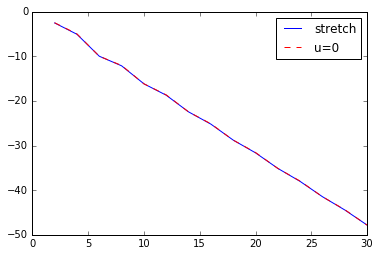

In [10]:
plt.plot(scan,bend_energy,'b',label='stretch')
plt.plot(scan,wo_bend,'r--',label='u=0')
plt.legend()

/Users/Macintosh/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


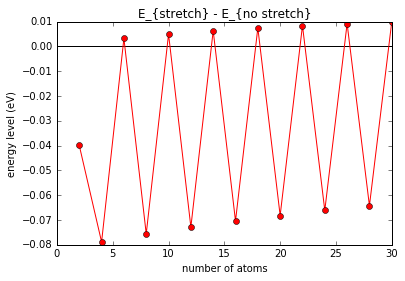

In [11]:
plt.title('E_{stretch} - E_{no stretch}')
plt.plot(scan,np.array(bend_energy) - np.array(wo_bend),'r-o')
plt.xlabel('number of atoms')
plt.ylabel('energy level (eV)')
#plt.hline(y=0)
plt.hlines(y=0,xmin=0,xmax=np.max(scan))

In [12]:
np.array(bend_energy) - np.array(wo_bend)

array([-0.03995   +0.j, -0.07885   +0.j,  0.00323321+0.j, -0.07560085+0.j,
        0.00494193+0.j, -0.07285499+0.j,  0.00631389+0.j, -0.07041234+0.j,
        0.0074458 +0.j, -0.06819036+0.j,  0.00839281+0.j, -0.06614243+0.j,
        0.00919056+0.j, -0.06423827+0.j,  0.00986404+0.j])

### Ans

Yes, the dimerization of the system stretches the bonds and might possibly produce energy states smaller than the un-stretched structure under certain u values and number of atoms in the ring.

According to the results shown above, the benzene would still have lower energy with all bonds being equivalent (u=0). For any 4n carbon-ring, the dimerization bonds should form spontaneouslu. This is shown in the valley of the energy level plot above.

## Peierls’ theorem

Peierls’ theorem about one-dimensional electron systems predicts that, for N-carbon rings with N large, the minimum total energy will be at some nonzero u∗. Verify that this is true in this case, and estimate u∗. How large does N have to be for this prediction to hold? What do you expect for retinal?

In [13]:
us = np.array([0.9,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001])  #scanning for u*
N_ = np.zeros(len(us))
for ii,uu in enumerate(us):  #u loop
    bend_energy = []
    wo_bend = []
    for nn in scan:  #number of atom loop
        ee,vv = np.linalg.eig(Hu(int(nn),uu))
        temp = np.sort(ee)
        bend_energy.append(np.sum(temp[:int(len(temp)/2)]) + (nn-1)*0.5*Ka*uu**2)  #with bending energy
        ee,vv = np.linalg.eig(Hu(int(nn),0))
        temp = np.sort(ee)
        wo_bend.append(np.sum(temp[:int(len(temp)/2)]))  #without
        
        differ = np.array(bend_energy) - np.array(wo_bend)
    N_[ii] = scan[np.where(differ>0)[0][0]]

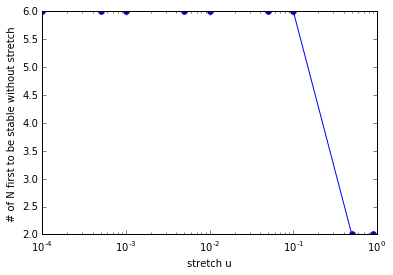

In [14]:
plt.semilogx(us,N_,'-o')
plt.xlabel('stretch u')
plt.ylabel('# of N first to be stable without stretch')

/Users/Macintosh/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


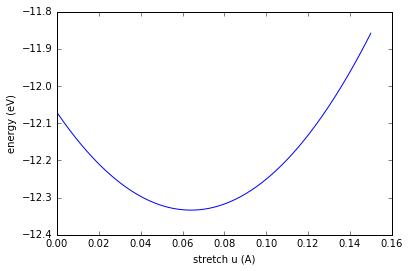

In [30]:
#scanning u
u = np.linspace(0,0.15,300)
K = []
nn=8
for uu in u:
    ee,vv = np.linalg.eig(Hu(int(nn),uu))
    temp = np.sort(ee)
    tempE = np.sum(temp[:int(len(temp)/2)]) + (nn-1)*0.5*Ka*uu**2 
    K.append(tempE)
plt.plot(u,K)
plt.xlabel('stretch u (A)')
plt.ylabel('energy (eV)')

In [23]:
#scan N find u*
ustep = 0.0005  #scanning for u*
ns = np.linspace(4,100,25)
us = np.linspace(0,0.1,300)
u_ = []
for nn in ns:  #number of atom loop
    differ = 0
    uu = 0
#     TEMP = []
    ee,vv = np.linalg.eig(Hu(int(nn),uu))
    temp = np.sort(ee)
    tempE = np.sum(temp[:int(len(temp)/2)]) + (nn-1)*0.5*Ka*uu**2  #with bending energy
#     for uu in us:
#         ee,vv = np.linalg.eig(Hu(int(nn),uu))
#         temp = np.sort(ee)
#         tempE = np.sum(temp[:int(len(temp)/2)]) + (nn-1)*0.5*Ka*uu**2 
#         TEMP.append
#         pos = np.argmin(np.array(TEMP))   
    while differ>=0:  #u loop
        uu = uu+ustep
        ee,vv = np.linalg.eig(Hu(int(nn),uu))
        temp = np.sort(ee)
        differ = tempE - (np.sum(temp[:int(len(temp)/2)]) + (nn-1)*0.5*Ka*uu**2)
        tempE = np.sum(temp[:int(len(temp)/2)]) + (nn-1)*0.5*Ka*uu**2
    u_.append(uu)

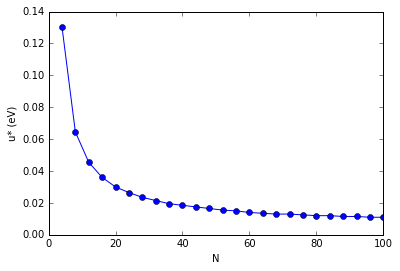

In [26]:
plt.plot(ns,u_,'-o')
plt.xlabel('N')
plt.ylabel('u* (eV)')

#### Ans

With different number of N in the N-carbon ring, the minimum u* value is plotted above. The curve saturates when N is much larger than 100, so it is less different adding more members at this point. I would expect that retinal molecule would have the number of carbons less than 100. We know the truth is that there is a 6-member benzen part in the structure.